<a href="https://colab.research.google.com/github/DorotaJanosz/machine-learning-projects/blob/master/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

np.random.seed(0)
plt.style.use('fivethirtyeight')


###Data exploration

In [95]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [96]:
df.shape

(200, 5)

In [97]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [99]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [100]:
df = df.drop('CustomerID', axis=1)
df.columns = ['Gender', 'Age', 'Income', 'Score']
df.head(5)

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [101]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male':1})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  200 non-null    int64
 1   Age     200 non-null    int64
 2   Income  200 non-null    int64
 3   Score   200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


###Data visualization

Pie chart for Gender

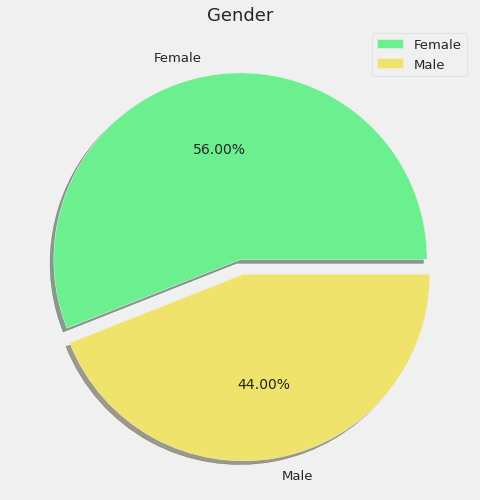

In [102]:
size = df['Gender'].value_counts()
labels = ['Female', 'Male']
explode = [0, 0.08,]
colors = ['#6cf08f', '#f0e36c']
 
plt.figure(figsize=(8, 8))
plt.pie(x=size, labels=labels, shadow=True, autopct="%1.2f%%", explode=explode, colors=colors)
plt.legend()
plt.title('Gender', fontsize = 18)
plt.show()


**Age distribution**

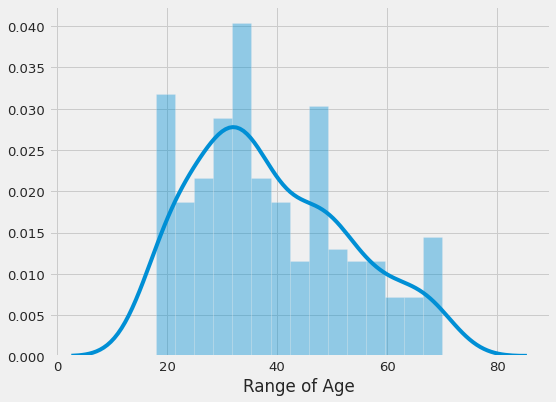

In [103]:
plt.figure(figsize=(8, 6))
sns.distplot(df['Age'], bins=15)
plt.xlabel('Range of Age')
plt.show()

People around 35 are the most frequent visitors in the Mall. The older age groups are the least frequent.

**Annual Income distribution**

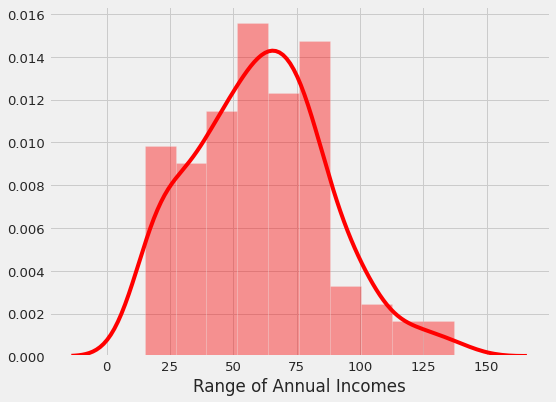

In [104]:
plt.figure(figsize=(8, 6))
sns.distplot(df['Income'], color='red', bins=10)
plt.xlabel('Range of Annual Incomes')
plt.show()

Most of the people have annual income around 50K - 75K US Dollars. There are few people who earn more the 100K US Dolllars.

**Spending Score (1-100) distribution** 

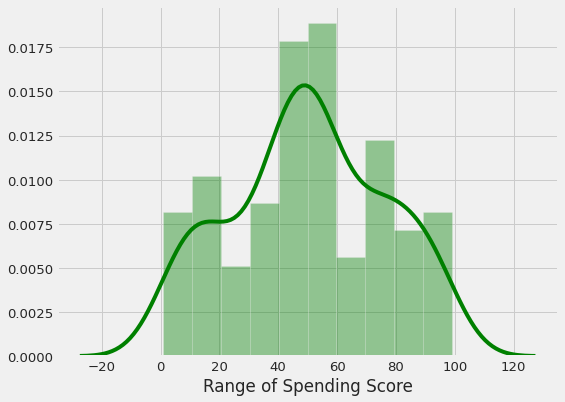

In [105]:
plt.figure(figsize=(8, 6))
sns.distplot(df['Score'], color='green', bins=10)
plt.xlabel('Range of Spending Score')
plt.show()

The minimus score is 1 and maximum is 99. Scores between 40 and 60 are the most frequent.

**Realtion between variables**

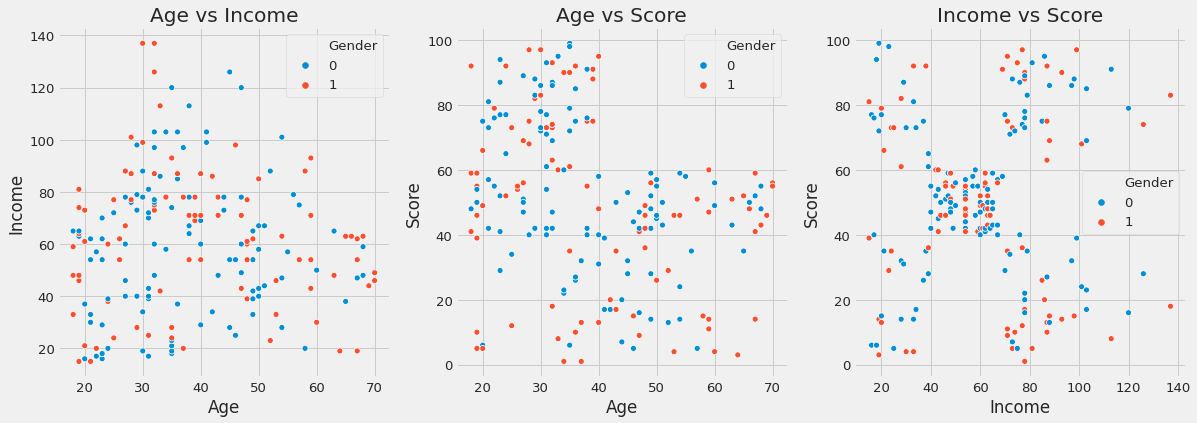

In [106]:
plt.figure(figsize=(18,6))
plt.subplot(131)
sns.scatterplot(x=df['Age'], y=df['Income'], hue=df['Gender'])
plt.title('Age vs Income')

plt.subplot(132)
sns.scatterplot(x=df['Age'], y=df['Score'], hue=df['Gender'])
plt.title('Age vs Score')

plt.subplot(133)
sns.scatterplot(x=df['Income'], y=df['Score'], hue=df['Gender'])
plt.title('Income vs Score')
plt.show()

In chart 'Income vs Score' we can see 5 different gropus of customers.

**Feature selection for the model**

We will be considering only 2 features (Annual income and Spending Score).

In [107]:
data = df.iloc[:, 2:]
data.head()

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


###KMeans

**Specifying the optimum number of clusters** 

In [108]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state = 0)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

print(wcss)

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37239.83554245604, 30273.394312070042, 25018.576334776335, 21850.165282585633, 19664.685196005543]


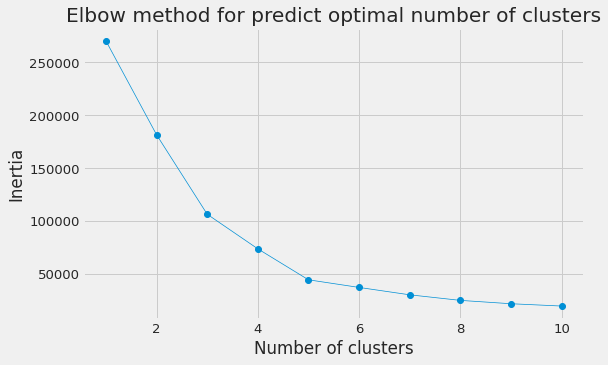

In [109]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linewidth=0.7)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for predict optimal number of clusters')
plt.show()

In [110]:
from sklearn.metrics import silhouette_samples, silhouette_score

X = data.copy()
X = X.values 

kmeans_per_k = []
for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
  y_means = kmeans.predict(X)
  kmeans_per_k.append(y_means)
kmeans_per_k

sil_score = []
for y in kmeans_per_k:
  score = silhouette_score(X,y)
  sil_score.append(score)
sil_score


[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5393922132561455,
 0.5270287298101395,
 0.4575689106804838,
 0.4565077334305076]

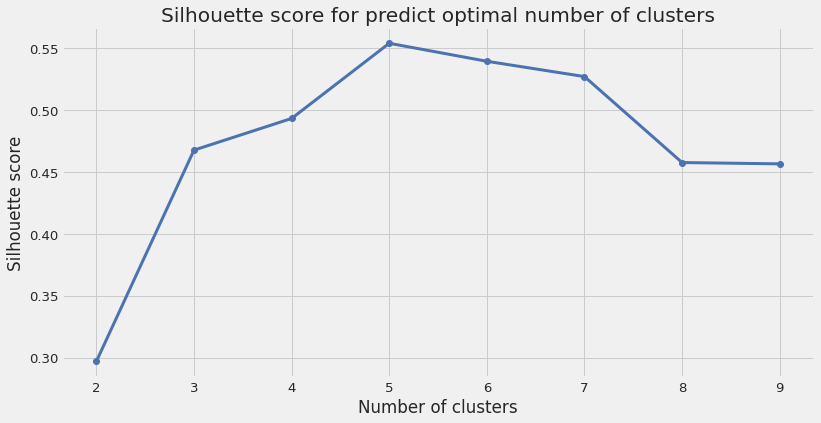

In [111]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 10), sil_score, 'bo-', linewidth=3)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for predict optimal number of clusters')
plt.show()

Based on elbow method and silhouette score = 0.55 we can see that the optimal number of clusters is 5.

In [112]:
kmeans = KMeans(n_clusters=5, random_state = 0)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

For n_clusters = 5 The average silhouette_score is : 0.553931997444648


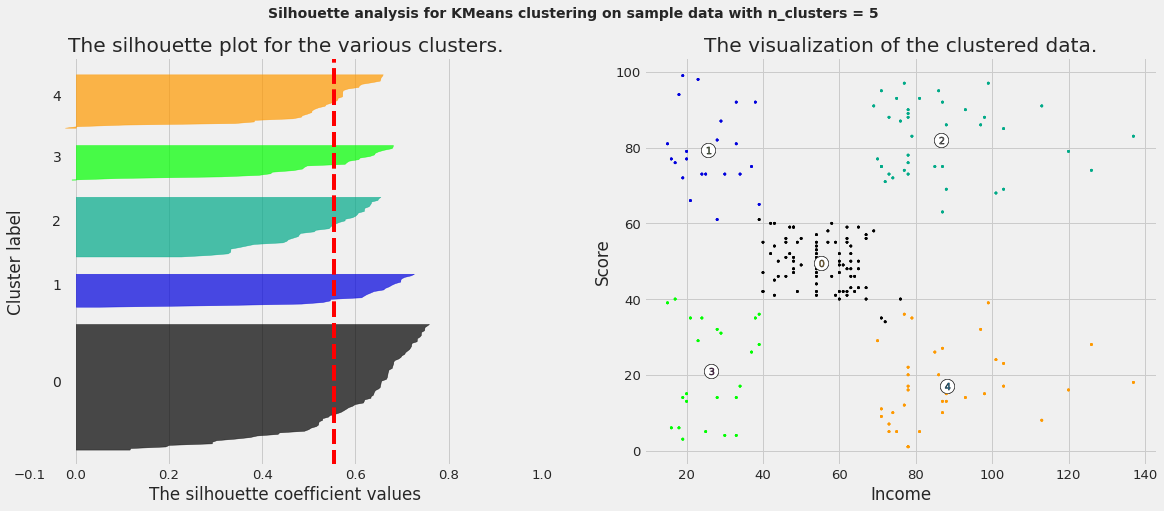

In [113]:
import matplotlib.cm as cm

X = data.copy()
X = X.values

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (5 + 1) * 10])



silhouette_avg = silhouette_score(X, y_kmeans)
print("For n_clusters =", 5,
          "The average silhouette_score is :", silhouette_avg)

sample_silhouette_values = silhouette_samples(X, y_kmeans)

y_lower = 10
for i in range(5):
  ith_cluster_silhouette_values = sample_silhouette_values[y_kmeans == i]
  ith_cluster_silhouette_values.sort()
  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i

  color = cm.nipy_spectral(float(i) / 5)
  ax1.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_cluster_silhouette_values,
                    facecolor=color, edgecolor=color, alpha=0.7)
  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
  y_lower = y_upper + 10  

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([]) 
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  colors = cm.nipy_spectral(y_kmeans.astype(float) / 5)
  ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

  centers = kmeans.cluster_centers_
  ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Income")
  ax2.set_ylabel("Score")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 5),fontsize=14, fontweight='bold')

**Segmentation using Income and Score**

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



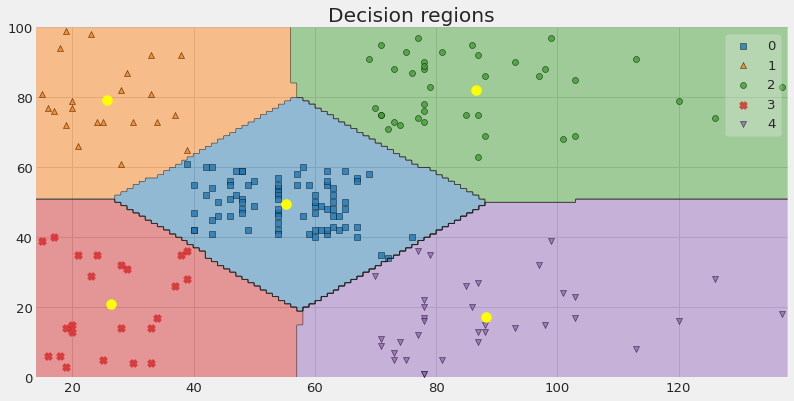

In [114]:
kmeans = KMeans(n_clusters=5, random_state = 0)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)
tmp = data[['Income', 'Score']]
tmp['Cluster'] = y_kmeans

centres = pd.DataFrame(data=kmeans.cluster_centers_, columns=['c1', 'c2'])
centres

from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(12, 6))
plot_decision_regions(data.values, y_kmeans, clf=kmeans)
plt.title('Decision regions')
plt.scatter(x=centres['c1'], y=centres['c2'], s=100, c='yellow')
plt.show()

**Visualization the clusters**

In [115]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [116]:
centres = pd.DataFrame(data=kmeans.cluster_centers_, columns=['c1', 'c2'])
centres

,c1,c2
0,55.296296,49.518519
1,25.727273,79.363636
2,86.538462,82.128205
3,26.304348,20.913043
4,88.200000,17.114286


In [117]:
fig = px.scatter(data_frame=tmp, x='Income', y='Score', color='Cluster', title='KMeans - 5 clusters', 
                 width=950, height=500)
fig.add_trace(go.Scatter(x=centres['c1'], y=centres['c2'], mode='markers', 
                         marker={'size': 12, 'color': 'LightSkyBlue', 'line': {'width':2, 'color': 'tomato'}},showlegend=False))


**KMeans with 3 features**

In [118]:
data2 = df.iloc[:, 1:]
data2['Cluster'] = y_kmeans
data2.head()

,Age,Income,Score,Cluster
0,19,15,39,3
1,21,15,81,1
2,20,16,6,3
3,23,16,77,1
4,31,17,40,3


In [119]:
import plotly as py
import plotly.graph_objs as go

trace0 = go.Scatter3d(x = data2[data2['Cluster'] == 0]['Age'], y = data2[data2['Cluster'] == 0]['Score'], z = data2[data2['Cluster'] == 0]['Income'], mode = 'markers',
        name = 'Cluster 0', marker = dict(size = 5) )
trace1 = go.Scatter3d(x = data2[data2['Cluster'] == 1]['Age'], y = data2[data2['Cluster'] == 1]['Score'], z = data2[data2['Cluster'] == 1]['Income'], mode = 'markers',
        name = 'Cluster 1', marker = dict(size = 5) )
trace2 = go.Scatter3d(x = data2[data2['Cluster'] == 2]['Age'], y = data2[data2['Cluster'] == 2]['Score'], z = data2[data2['Cluster'] == 2]['Income'], mode = 'markers',
        name = 'Cluster 2', marker = dict(size = 5) )
trace3 = go.Scatter3d(x = data2[data2['Cluster'] == 3]['Age'], y = data2[data2['Cluster'] == 3]['Score'], z = data2[data2['Cluster'] == 3]['Income'], mode = 'markers',
        name = 'Cluster 3', marker = dict(size = 5) )
trace4 = go.Scatter3d(x = data2[data2['Cluster'] == 4]['Age'], y = data2[data2['Cluster'] == 4]['Score'], z = data2[data2['Cluster'] == 4]['Income'], mode = 'markers',
        name = 'Cluster 4', marker = dict(size = 5) )

traces = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)

###Hierarchial Clustering

In [120]:
data.head()

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


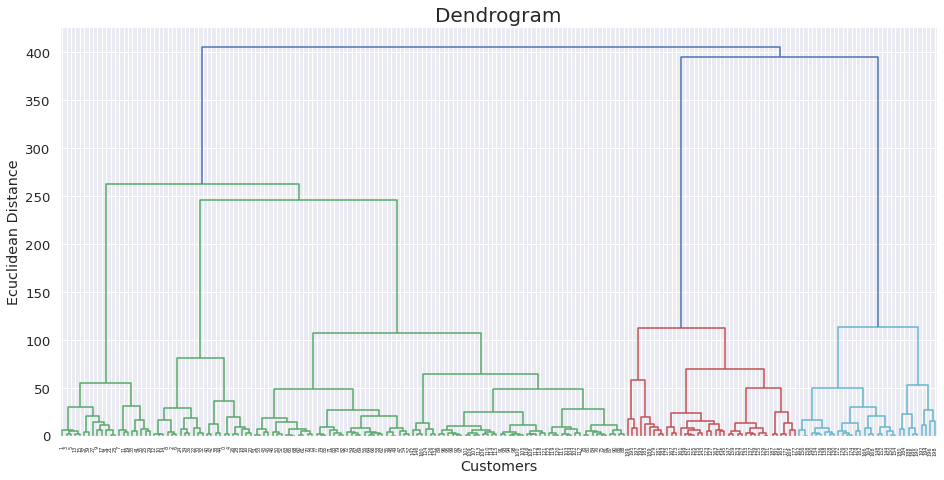

In [121]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
sns.set(font_scale=1.2)

linked = linkage(data, method='ward')
plt.figure(figsize=(14,7))
dendrogram(linked, orientation='top', distance_sort='descending')
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

Based on dendrogram we can see that the optimal number of clusters is 5.

**Visualization the clusters**

In [122]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(data)


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [123]:
tmp = data[['Income', 'Score']]
tmp['Cluster'] = cluster.labels_
tmp.head()

,Income,Score,Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [124]:
fig = px.scatter(data_frame=tmp, x='Income', y='Score', color='Cluster', title='Hierarchial Clustering - 5 clusters', 
                 width=950, height=500)
fig.show()

###DBSCAN

In [125]:
from sklearn.cluster import DBSCAN

epsilon = np.arange(8, 15, 0.5) 
no_samples = np.arange(3, 8)

from itertools import product
DBSCAN_params = list(product(epsilon, no_samples))

no_of_clusters = []
sil_score = []
for param in DBSCAN_params:
      db = DBSCAN(param[0], param[1])
      db.fit(data)
      no_of_clusters.append(len(np.unique(db.labels_)))
      sil_score.append(silhouette_score(data, db.labels_))

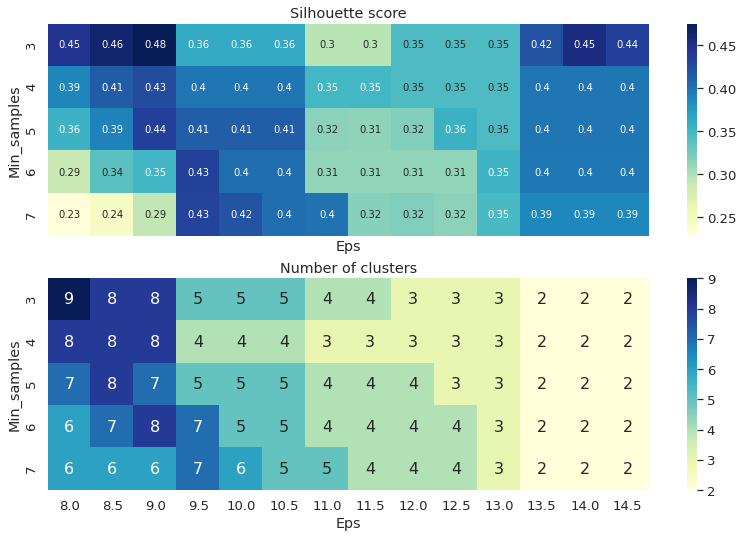

In [126]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

tmp2 = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp2['No_of_clusters'] = no_of_clusters
pivot_2 = pd.pivot_table(tmp2, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,sharex=True, figsize=(12, 8)) 
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax1)
ax1.set_title('Silhouette score')

sns.heatmap(pivot_2, annot=True, annot_kws={"size": 16}, cmap="YlGnBu", ax=ax2)
ax2.set_title('Number of clusters')
plt.show()


The score is high for eps=10 ,min_sample=7. The optimal number of clusters is 5  plus outliers cluster (-1).

In [127]:
cluster = DBSCAN(eps=10, min_samples=7) 
cluster.fit(data)
tmp = data[['Income', 'Score']]
tmp['Cluster'] = cluster.labels_
cluster.labels_


array([ 2,  1,  0,  1,  2,  1,  0, -1,  0,  1,  0, -1,  0,  1,  0,  1,  2,
        1,  2, -1,  2,  1,  0,  1,  0,  1,  2, -1,  2,  1,  0,  1,  0, -1,
        0,  1,  0,  1,  2,  1,  2, -1,  2,  2,  2,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1,  3,  4,  3, -1,  3, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [128]:
px.scatter(tmp, x='Income', y='Score', color='Cluster', width=950, height=500, 
           title='DBSCAN(eps=10,  min_samples=7)', color_continuous_midpoint=0)

###Analyzing the results

Based on features: annual income and spending score we can see that the best results we get when we divide customers into 5 groups:

- clients with low annual income and high spending score
- clients with annual income and spending score
- clients with annual income and spending score
- clients with high annual income and high spending score
- clients with low annual income and low spending score


The biggest cluster is a cluster with medium-medium clients.
The best results we get when we use KMeans or Hierarchical clustering.

###PCA

**2 Components**

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(df)
data_std[:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

In [130]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)
data_pca[:5]

array([[-0.40638272, -0.52071363],
       [-1.42767287, -0.3673102 ],
       [ 0.05076057, -1.89406774],
       [-1.6945131 , -1.63190805],
       [-0.31310838, -1.81048272]])

In [131]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = ['pca_1', 'pca_2']
results.head()

,explained_variance_ratio,cumulative,component
0,0.336900,0.336900,pca_1
1,0.262306,0.599207,pca_2


In [132]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 2 components', width=950))
fig.show()

In [133]:
kmeans = KMeans(n_clusters=5, random_state = 0)
kmeans.fit(data_pca)
y_kmeans = kmeans.predict(data_pca)

In [134]:
pca_2 = pd.DataFrame(data_pca, columns=['pca_1', 'pca_2'])
pca_2['Cluster'] = y_kmeans
pca_2.head()

,pca_1,pca_2,Cluster
0,-0.406383,-0.520714,4
1,-1.427673,-0.367310,0
2,0.050761,-1.894068,4
3,-1.694513,-1.631908,0
4,-0.313108,-1.810483,4


In [135]:
px.scatter(pca_2, 'pca_1', 'pca_2', color=pca_2['Cluster'], width=950)

**3 Components**

In [136]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_std)
data_pca[:5]

array([[-0.40638272, -0.52071363, -2.07252663],
       [-1.42767287, -0.3673102 , -2.27764369],
       [ 0.05076057, -1.89406774, -0.36737523],
       [-1.6945131 , -1.63190805, -0.71746669],
       [-0.31310838, -1.81048272, -0.42645992]])

In [137]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = ['pca_1', 'pca_2', 'pca_3']
results.head()

,explained_variance_ratio,cumulative,component
0,0.336900,0.336900,pca_1
1,0.262306,0.599207,pca_2
2,0.232606,0.831813,pca_3


In [138]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 2 components', width=950))
fig.show()

In [139]:
kmeans = KMeans(n_clusters=5, random_state = 0)
kmeans.fit(data_pca)
y_kmeans = kmeans.predict(data_pca)

In [140]:
pca_3 = pd.DataFrame(data_pca, columns=['pca_1', 'pca_2', 'pca_3'])
pca_3['Cluster'] = y_kmeans
pca_3.head()

,pca_1,pca_2,pca_3,Cluster
0,-0.406383,-0.520714,-2.072527,3
1,-1.427673,-0.367310,-2.277644,3
2,0.050761,-1.894068,-0.367375,0
3,-1.694513,-1.631908,-0.717467,0
4,-0.313108,-1.810483,-0.426460,0


In [141]:
px.scatter_3d(pca_3, x='pca_1', y='pca_2', z='pca_3', color='Cluster', opacity=0.7, size_max=10, width=950)